## Scraping data from twitter with tweepy

In [1]:
import tweepy 
import csv
import pandas as pd

import time
import sys

#Twitter API mots de passe
consumer_key = "wVAJktr0CoVsypP3V3FCYMRXk"
consumer_secret = "P9GlRQBIAyVzuguEEdJqPKGIWBSbPGkCubR5EyhiXRz0slJiNp"
access_key = "984606196807200770-nnYMZEIrAWnqZOzqVjkCfbyTW8vI0i9"
access_secret = "kxj3sYLZg4BQktUhBB35Mo7iCsJ3qYxrS7BnqMw8lp7N0"

OAUTH_KEYS = {'consumer_key':consumer_key, 'consumer_secret':consumer_secret,
 'access_token_key':access_key, 'access_token_secret':access_secret}
auth = tweepy.OAuthHandler(OAUTH_KEYS['consumer_key'], OAUTH_KEYS['consumer_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
NoOfTerms=5000
searchTerm='Khashoggi'
search = tweepy.Cursor(api.search, q=searchTerm).items(NoOfTerms) # ici on spécifie le mot clé

# Creation des listes pour chaque tweet
sn = []
text = []
timestamp =[]


In [2]:
for tweet in search:
    #print tweet.user.screen_name, tweet.created_at, tweet.text
    timestamp.append(tweet.created_at)
    sn.append(tweet.user.screen_name)
    text.append(tweet.text)


Rate limit reached. Sleeping for: 145


In [3]:
from  textblob import TextBlob 
good=TextBlob("im the best datacientist")
bad=TextBlob("i adore asma")
neutral=TextBlob("im a datascientist")


In [4]:
len(sn)

5000

In [5]:
# Converstion des listes vers des dataframe (objet pandas)
df = pd.DataFrame()
df['timestamp'] = timestamp
df['sn'] = sn

df['text'] = text

In [6]:
# Pour décaler les temps par rapport à l'heure locale aux états unis
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['EST'] = df['timestamp'] - pd.Timedelta(hours=5)

df['EST'] = pd.to_datetime(df['EST'])
df.to_csv('Khatweet.csv',index = False,encoding='utf-8')
allNames = list(df['sn'].unique())

In [7]:
dfUsers = pd.DataFrame()
dfUsers['userFromName'] =[]
dfUsers['userFromId'] =[]
dfUsers['userToId'] = []
count = 0

In [8]:
len(sn)

5000

In [9]:
df.head()

,timestamp,sn,text,EST
0,2018-11-16 19:31:06,ma000111,RT @zerohedge: Planning of Khashoggi's 'execut...,2018-11-16 14:31:06
1,2018-11-16 19:31:03,luellen_terry,RT @SecPompeo: The U.S. has imposed sanctions ...,2018-11-16 14:31:03
2,2018-11-16 19:30:57,bayer_julia,RT @malachybrowne: Just how high up the Saudi ...,2018-11-16 14:30:57
3,2018-11-16 19:30:57,dazyjane410,"RT @kelly2277: 🔥Ahmad al Assiri, Saudi Deputy ...",2018-11-16 14:30:57
4,2018-11-16 19:30:55,Snarktopia,"RT @jonathan_jerald: This is a bad, evil plan:...",2018-11-16 14:30:55


In [10]:
def cleanTweet(tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

In [11]:
def percentage(part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

In [12]:
def plotPieChart( positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()


How people are reacting on Khashoggi by analyzing 5000 tweets.

General Report: 
Weakly Negative

Detailed Report: 
-0.0451201373383558%  la moyenne sentimentale
7.42% people thought it was positive
8.18% people thought it was weakly positive
1.70% people thought it was strongly positive
8.60% people thought it was negative
17.66% people thought it was weakly negative
3.08% people thought it was strongly negative
52.56% people thought it was neutral


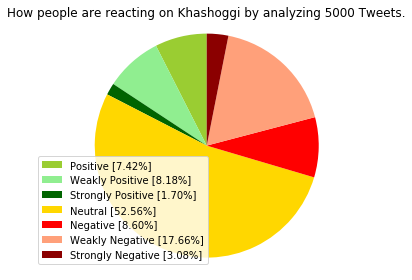

In [13]:
    import re,csv
    import matplotlib.pyplot as plt   
    %matplotlib inline  
  
    polarity = 0
    positive = 0
    wpositive = 0
    spositive = 0
    negative = 0
    wnegative = 0
    snegative = 0

    neutral = 0

    textList=[]
    textList=df["text"].values.tolist()
    # iterating through tweets fetched
    for t in df["text"].values:
            #Append to temp so that we can store in csv later. I use encode UTF-8
            textList.append(cleanTweet(t).encode('utf-8'))
            # print (tweet.text.translate(non_bmp_map))    #print tweet's text
            analysis = TextBlob(t)
            # print(analysis.sentiment)  # print tweet's polarity
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1


    # finding average of how people are reacting
    positive = percentage(positive, NoOfTerms)
    wpositive = percentage(wpositive, NoOfTerms)
    spositive = percentage(spositive, NoOfTerms)
    negative = percentage(negative, NoOfTerms)
    wnegative = percentage(wnegative, NoOfTerms)
    snegative = percentage(snegative, NoOfTerms)
    neutral = percentage(neutral, NoOfTerms)

    # finding average reaction
    polarity = polarity / NoOfTerms

        # printing out data
    print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
    print()
    print("General Report: ")

    if (polarity == 0):
        print("Neutral")
    elif (polarity > 0 and polarity <= 0.3):
        print("Weakly Positive")
    elif (polarity > 0.3 and polarity <= 0.6):
        print("Positive")
    elif (polarity > 0.6 and polarity <= 1):
        print("Strongly Positive")
    elif (polarity > -0.3 and polarity <= 0):
        print("Weakly Negative")
    elif (polarity > -0.6 and polarity <= -0.3):
        print("Negative")
    elif (polarity > -1 and polarity <= -0.6):
        print("Strongly Negative")

    print()
    print("Detailed Report: ")
    print(str(polarity) + "%  la moyenne sentimentale")

    print(str(positive) + "% people thought it was positive")
    print(str(wpositive) + "% people thought it was weakly positive")
    print(str(spositive) + "% people thought it was strongly positive")
    print(str(negative) + "% people thought it was negative")
    print(str(wnegative) + "% people thought it was weakly negative")
    print(str(snegative) + "% people thought it was strongly negative")
    print(str(neutral) + "% people thought it was neutral")

    plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)
    
    

## Tokenizing words to count the most meaningful ones

In [14]:
#For text tokenization and count
import nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter
#For removing stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['I' ,'rt', 'RT' , '’', '…' , 'via']
#For recognizing meaningful words
import operator 
from nltk import bigrams 
from collections import defaultdict
 
com = defaultdict(lambda : defaultdict(int))

[nltk_data] Downloading package punkt to C:\Users\Radhi
[nltk_data]     Toujani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Radhi
[nltk_data]     Toujani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

## Counting most important words

In [16]:
count_stop = Counter()
count_hash = Counter()
count_bigram = Counter()


for tweet in text:
    # Create a list with meaningful terms
    terms_stop = [term for term in preprocess(tweet) if term not in stop]
    # Update the counter
    count_stop.update(terms_stop)
    
    #Create a list of bigrams
    terms_bigram = bigrams(terms_stop)
    count_bigram.update(terms_bigram)
    
    # Count hashtags only
    terms_hash = [term for term in preprocess(tweet) if term.startswith('#')]
    count_hash.update(terms_hash)
    

# Print the first 5 most frequent words

print(count_hash.most_common(10))
print(count_stop.most_common(10))
print(count_bigram.most_common(10))

[('#Khashoggi', 310), ('#Khash', 225), ('#khashoggi', 136), ('#السعودية', 91), ('#Saudi', 77), ('#JamalKhashoggi', 56), ('#اسطنبو', 53), ('#Turkey', 44), ('#جمال_خاشقجي', 35), ('#FetöSiyahsaBizBeyazız', 35)]
[('Khashoggi', 2501), ('Saudi', 2179), ('Jamal', 1494), ('murder', 924), ('The', 900), ('Arabia', 762), ('S', 700), ('killing', 655), ('U', 609), ('sanctions', 530)]
[(('Jamal', 'Khashoggi'), 1108), (('Saudi', 'Arabia'), 726), (('U', 'S'), 603), (('sanctions', '17'), 287), (('murder', 'Jamal'), 262), (('17', 'Saudi'), 237), (('killing', 'Jamal'), 235), (('Khashoggi', 'killing'), 234), (('The', 'U'), 231), (('imposed', 'sanctions'), 231)]


## Wordcloud

In [17]:
import os
from wordcloud import WordCloud , STOPWORDS
from PIL import Image
import numpy as np

def create_wordcloud(input_text):
    mask = np.array(Image.open(os.path.join("twitter.png")))
    STOPWORDS.add("RT")
    STOPWORDS.add("https")
    STOPWORDS.add("Counter")

    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", mask=mask, max_words=150,stopwords=stopwords)
    wc.generate(input_text)
    wc.to_file(os.path.join("wc.png"))
    
chaine = str(text)
create_wordcloud(chaine)


## Visualization with WordCloud

Tweets text wordcloud


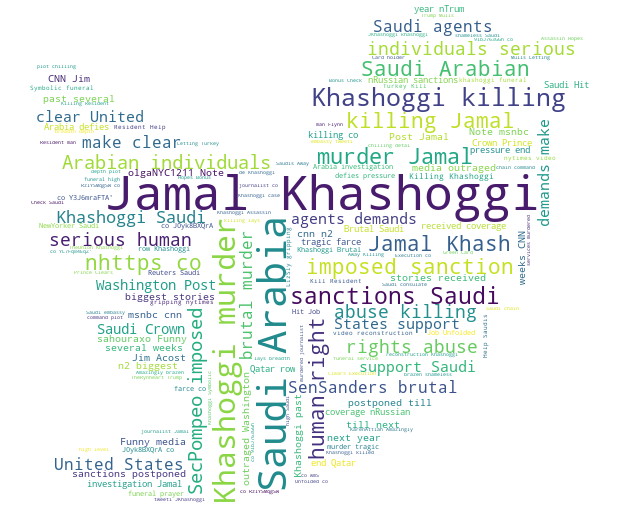

In [18]:
from IPython.display import Image
print("Tweets text wordcloud")
Image("wc.png")

In [19]:
import os
from wordcloud import WordCloud , STOPWORDS
from PIL import Image
import numpy as np

def create_wordcloud(input_text):
    mask = np.array(Image.open(os.path.join("twitter.png")))
    STOPWORDS.add("RT")
    STOPWORDS.add("https")
    STOPWORDS.add("Counter")

    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", mask=mask, max_words=150,stopwords=stopwords)
    wc.generate(input_text)
    wc.to_file(os.path.join("wcHash.png"))
    
chaine = str(count_hash)
create_wordcloud(chaine)

Tweets hashtag wordcloud


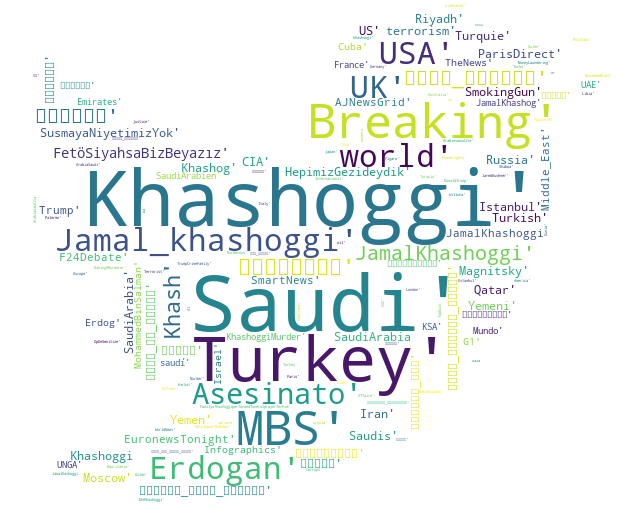

In [20]:
from IPython.display import Image
print("Tweets hashtag wordcloud")
Image("wcHash.png")

In [21]:
dftweets = pd.read_csv("khatweet.csv")
dftweets.text
RT = []
match = []
sentiment = []
count_all = Counter()
for tweet in dftweets.text:
    analyse = TextBlob(tweet)
    if analyse.sentiment.polarity < 0:
        sentiment.append("bad")
    if analyse.sentiment.polarity > 0:
        sentiment.append("good")
    if analyse.sentiment.polarity == 0:
        sentiment.append("neutral")    
    
    result = re.search(r"@[^ :]+", tweet)
    if result is None:
        match.append("No retweet")
    else:
        match.append(str(result.group(0)))

In [30]:
dfGraph = pd.DataFrame()
dfGraph['Target'] = sn
dfGraph['Source'] = match
#dfGraph['Weight'] = sentiment

dfGraph.to_csv('Kharetweet.csv',index = False,encoding='utf-8')

In [23]:
import networkx as nx
g = nx.Graph()

In [24]:
def add_node_twitter(n,weight = None,time = None, source = None, location = None):
    if not g.has_node(n):
        screen_name = get_user_info(n)

In [36]:
count_bigram.most_common(100)[0][0][0]

'Jamal'

In [39]:
word1=[]
word2=[]
cooc=[]
for bigram1 in count_bigram.most_common(1000):
    word1.append(bigram1[0][0])
    word2.append(bigram1[0][1])
    cooc.append(bigram1[1])
    

In [43]:
dfBigram = pd.DataFrame()
dfBigram['Source'] = word1
dfBigram['Target'] = word2

dfBigram['Weight'] = cooc

dfBigram.to_csv('Khawords.csv',index = False,encoding='utf-8')